# I decided to treat this as a classification problem by creating a new binary  variable affair (did the woman have at least one affair?) and trying to  predict the classification for each woman. 

In [161]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score

In [162]:
dta = sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [163]:
dta['affair'] = (dta.affairs > 0).astype(int) 

In [164]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [165]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +  C(occupation) + C(occupation_husb)', dta, return_type="dataframe") 

In [166]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [167]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [168]:
X = X.rename(columns =  
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 


In [169]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [170]:
y = np.ravel(y) 

In [171]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [172]:
X= X.drop(columns="Intercept")

In [173]:
X

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [174]:
a=pd.DataFrame(y,columns=["affare"])
print(a[a["affare"]==0].count())
print(a[a["affare"]==1].count())

affare    4313
dtype: int64
affare    2053
dtype: int64


In [175]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [176]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [177]:
log_reg = LogisticRegression()

In [178]:
log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
log_reg.predict(np.array([[0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,22.0,6.0,1.0,1.0,14.0]]))

array([0.])

In [180]:
log_reg.score(x_train,y_train)

0.7219167321288296

In [181]:
log_reg.score(x_test,y_test)

0.7394034536891679

In [182]:
y_pred= log_reg.predict(x_test)
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [183]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

In [184]:
accuracy_score(y_test,y_pred)

0.7394034536891679

In [185]:
a=confusion_matrix(y_test,y_pred)
a

array([[782,  90],
       [242, 160]], dtype=int64)

In [186]:
a

array([[782,  90],
       [242, 160]], dtype=int64)

In [187]:
tp = a[0][0]
fp = a[0][1]
fn = a[1][0]
tn = a[1][1]

In [188]:
recall = tp/(tp+fn)
recall

0.763671875

In [189]:
precision = tp/(tp+fp)
precision

0.8967889908256881

In [190]:
accuracy_score(y_test,y_pred)

0.7394034536891679

In [191]:
log_reg.predict(np.array([[1,0,0,0,0,1,0,0,0,0,4,32,5,2,3,17]]))

array([0.])

In [192]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

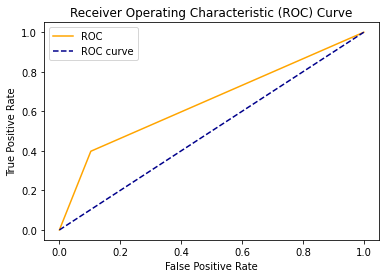

In [193]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [201]:
log_reg.predict(np.array([[0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0]]))

array([0.])

In [195]:
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [197]:
y_test

array([0., 1., 1., ..., 1., 1., 1.])

In [198]:
x_test

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
4269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,9.0,1.0,3.0,12.0
1147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,27.0,6.0,1.0,2.0,12.0
1683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,37.0,13.0,3.0,1.0,12.0
2992,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,2.5,1.0,2.0,12.0
5114,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,37.0,16.5,2.0,3.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,32.0,6.0,2.0,2.0,17.0
3828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,37.0,16.5,3.0,2.0,14.0
616,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,32.0,16.5,3.0,2.0,14.0
575,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,22.0,6.0,2.0,3.0,12.0


In [200]:
log_reg.predict(np.array([[1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,27.0,6.0,1.0,2.0,12.0]]))

array([1.])